# **Spotify Prediction**

## Introduction & Goal

Our team has chosen the Hugging Face Spotify Tracks dataset (https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset), which contains 114,000 spotify tracks and 20 variables.

The goal is to predict **energy** based on acousticness, loudness, instrumentalness and other factors.

The key features we have decided to study are **popularity, duration, danceability, key, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo**, and energy (for training). We chose to focus specifically on musical elements to see if there are certain audio features that contributes to the energy level of a song. This would be incredibly useful if we want to create high-energy playlists for listeners on spotify such as "Energy Motivation Mix" or "Hype Workout Mix".


In [12]:
from datascience import *
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [13]:
# Load in data
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

## Data Cleaning

In [14]:
# Examine features
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [15]:
# Data dimension
df.shape

(114000, 21)

In [16]:
# Remove unnamed columns
df = df.drop(["Unnamed: 0"], axis=1)
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [17]:
df.sample(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
11581,1WUHeOPayLKPMG35uBJVUj,John Smith,Headlong,Far Too Good,62,219333,False,0.825,0.324,4,-11.399,1,0.0320,0.830000,0.000095,0.1150,0.553,97.019,4,british
29746,5zJkRl2lsuP1bD1djEodCZ,ATLiens,Obsidian Vortex,Obsidian Vortex,48,162253,False,0.743,0.986,1,-3.117,1,0.0914,0.057300,0.028600,0.1220,0.185,141.997,4,dubstep
32454,6hDqua7fwHmLIzULajiZe8,Prabh Deep,Kala,Kala,28,210592,False,0.759,0.395,8,-13.771,1,0.4870,0.787000,0.000000,0.1100,0.905,114.951,4,electronic
71241,0OxDGZakSMFjEHSoQHEjfy,Deep Purple,80s Bangers Vol. 2,Perfect Strangers,1,328426,False,0.521,0.720,2,-7.699,1,0.0254,0.003520,0.011400,0.3910,0.609,97.577,4,metal
41397,5d0B19teJRYmeAx1B5vH9K,Within Temptation,Mother Earth,Ice Queen - Live,25,310026,False,0.295,0.670,8,-8.206,0,0.0472,0.006030,0.000000,0.3360,0.321,185.116,4,goth
89216,54kofthDNPNcQVuia0NuDl,Jhayco;Anuel AA,pov: it's 2021,Ley Seca,0,263666,False,0.759,0.843,8,-3.718,1,0.0913,0.127000,0.000000,0.1140,0.560,105.016,4,reggaeton
43723,61nq0jg2PYWxUUiarofGBI,Machine Head,Circle The Drain,Circle The Drain,54,245137,True,0.442,0.932,11,-6.258,1,0.0575,0.000145,0.000004,0.2800,0.303,152.028,4,groove
106384,6QRf4PNCyrYS2qEu0nKdg4,Lov1,Profeterna på Balkongen,Vad röker du?,40,177973,True,0.751,0.767,7,-6.810,1,0.1160,0.096800,0.000000,0.3420,0.481,118.054,4,swedish
82663,1eWIf1OBcQ4S1prYGVdiJP,The Smithereens,Out Of This World,Out Of This World,22,213080,False,0.598,0.936,6,-3.423,0,0.0482,0.008660,0.000002,0.0368,0.722,118.130,4,power-pop
56412,2jRNrnZDkyv08HNkygEj2W,Tribal Rain,Roka Yo Samay,Laijaw Malai,47,216999,False,0.759,0.170,4,-16.399,1,0.0500,0.936000,0.264000,0.1080,0.536,130.011,3,indie-pop


In [18]:
missing_prop = df.isna().sum() / len(df.index)
missing_prop.sort_values()
missing_rows = df[df.isna().any(axis=1)]

print("Number of missing data rows:", len(missing_rows))
print("Missing data rows:")
print(missing_rows)

Number of missing data rows: 1
Missing data rows:
                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  


The one missing row might be because the name and artists are in Korean since it is a k-pop genre song.

In [19]:
# list of number of tracks (rows) in each unique track_genre
for genre in df['track_genre'].unique():
  print(f"{genre}: {len(df[df['track_genre'] == genre])}")

acoustic: 1000
afrobeat: 1000
alt-rock: 1000
alternative: 1000
ambient: 1000
anime: 1000
black-metal: 1000
bluegrass: 1000
blues: 1000
brazil: 1000
breakbeat: 1000
british: 1000
cantopop: 1000
chicago-house: 1000
children: 1000
chill: 1000
classical: 1000
club: 1000
comedy: 1000
country: 1000
dance: 1000
dancehall: 1000
death-metal: 1000
deep-house: 1000
detroit-techno: 1000
disco: 1000
disney: 1000
drum-and-bass: 1000
dub: 1000
dubstep: 1000
edm: 1000
electro: 1000
electronic: 1000
emo: 1000
folk: 1000
forro: 1000
french: 1000
funk: 1000
garage: 1000
german: 1000
gospel: 1000
goth: 1000
grindcore: 1000
groove: 1000
grunge: 1000
guitar: 1000
happy: 1000
hard-rock: 1000
hardcore: 1000
hardstyle: 1000
heavy-metal: 1000
hip-hop: 1000
honky-tonk: 1000
house: 1000
idm: 1000
indian: 1000
indie-pop: 1000
indie: 1000
industrial: 1000
iranian: 1000
j-dance: 1000
j-idol: 1000
j-pop: 1000
j-rock: 1000
jazz: 1000
k-pop: 1000
kids: 1000
latin: 1000
latino: 1000
malay: 1000
mandopop: 1000
metal: 100

There is only 1 row missing some values, so we are removing this row.

In [20]:
df = df.dropna()

missing_prop = df.isna().sum() / len(df.index)
missing_prop.sort_values()
missing_rows = df[df.isna().any(axis=1)]

print("Number of missing data rows:", len(missing_rows))
print("Missing data rows:")
print(missing_rows)

Number of missing data rows: 0
Missing data rows:
Empty DataFrame
Columns: [track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []


## Exploratory Data Analysis

### Average Energy per Genre

In [21]:
avg_energy_per_genre = df.groupby('track_genre')['energy'].mean().reset_index()
avg_energy_per_genre.columns = ['Genre', 'Average Energy']
avg_energy_per_genre_sorted = avg_energy_per_genre.sort_values(by='Average Energy', ascending=True)
pd.set_option('display.max_rows', None)
print(avg_energy_per_genre_sorted)

                 Genre  Average Energy
16           classical        0.189827
75             new-age        0.214501
4              ambient        0.237162
93             romance        0.294304
26              disney        0.302519
76               opera        0.317054
79               piano        0.320103
45              guitar        0.324999
101              sleep        0.342072
64                jazz        0.352954
52          honky-tonk        0.366957
108              tango        0.372828
98          show-tunes        0.398742
105              study        0.410658
15               chill        0.426723
99   singer-songwriter        0.434188
102         songwriter        0.434188
0             acoustic        0.435368
12            cantopop        0.461696
94                 sad        0.462470
14            children        0.494645
70            mandopop        0.498434
11             british        0.507127
91         rock-n-roll        0.526615
7            bluegrass   

### Box-Whisker Plot of Energy per Genre

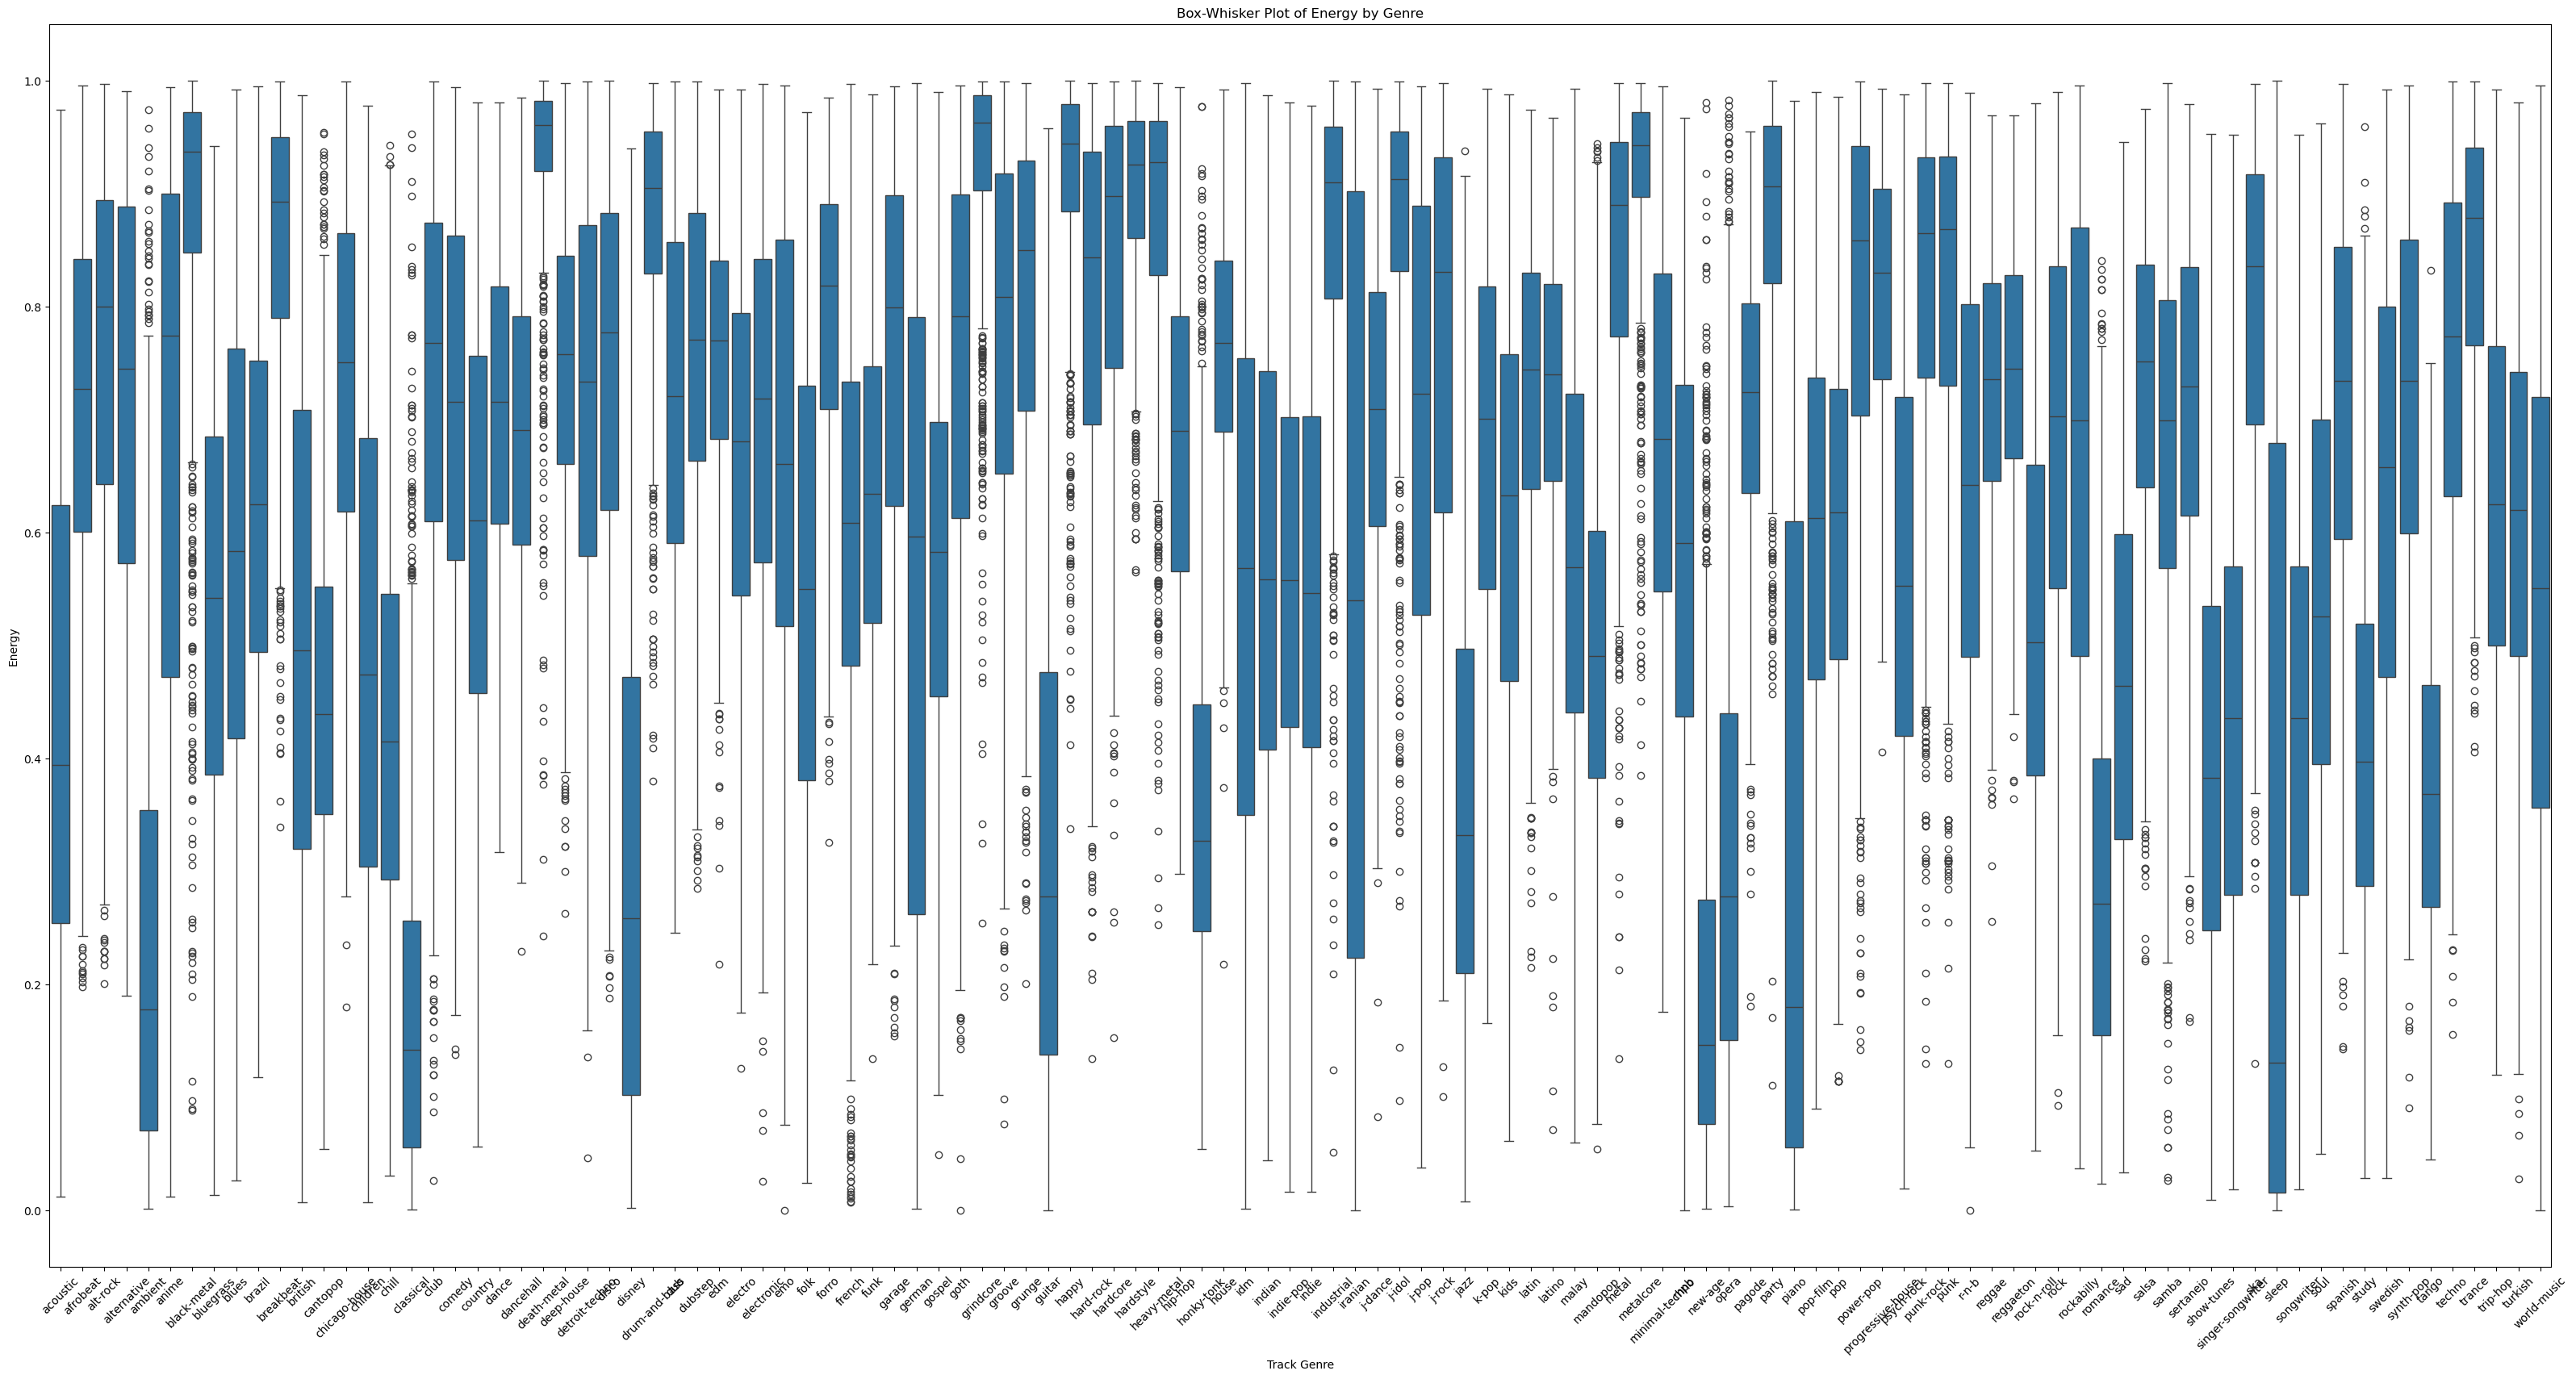

In [22]:
%matplotlib inline
plt.figure(figsize=(40, 20))

sns.boxplot(x='track_genre', y='energy', data = df)
plt.title('Box-Whisker Plot of Energy by Genre')
plt.xlabel('Track Genre')
plt.ylabel('Energy')

plt.xticks(rotation=45)
plt.show()

### Correlation Matrix

Non-numeric Features: ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre'] 

Correlation with Energy: 
 energy              1.000000
loudness            0.761690
valence             0.258937
tempo               0.247852
time_signature      0.187127
liveness            0.184795
speechiness         0.142508
danceability        0.134325
duration_ms         0.058520
key                 0.048007
popularity          0.001053
mode               -0.078365
instrumentalness   -0.181880
acousticness       -0.733908
Name: energy, dtype: float64


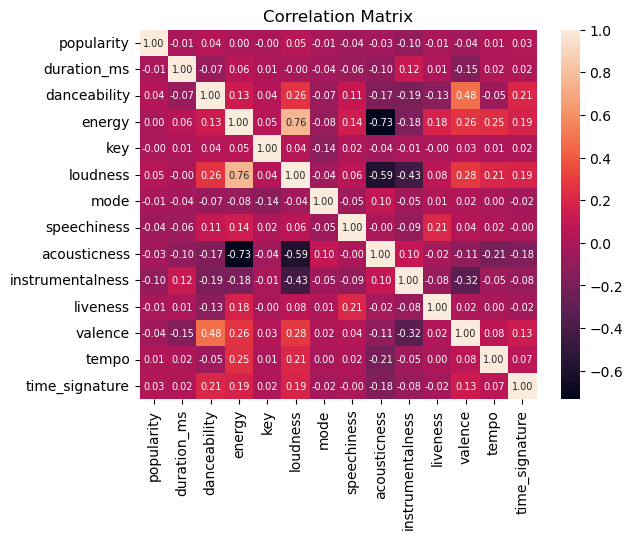

In [23]:
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric Features:", non_numeric_cols, "\n")

numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
energy_correlation = correlation_matrix['energy'].sort_values(ascending=False)
print("Correlation with Energy:", "\n", energy_correlation)

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', annot_kws={'size': 7})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Matrix")
plt.show()

From our correlation matrix, we can see that energy is heavily correlated with loudness (0.76) and acousticness (-0.73),

### Density Plots for High and Low Energy

To split the energy feature into a binary feature, we are specifying the threshold to be the 50th percentile. 

This means that the tracks in the top half of all energy values will be "high", and the rest will be "low".

In [24]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
threshold = df_copy['energy'].median()
df_copy["energy_level"] = df_copy['energy'].apply(lambda x: "high" if x>=threshold else "low")

le = LabelEncoder() #encode as 0 or 1 (1 = high, 0 = low)
df_copy['energy_level'] = le.fit_transform(df_copy['energy_level'])

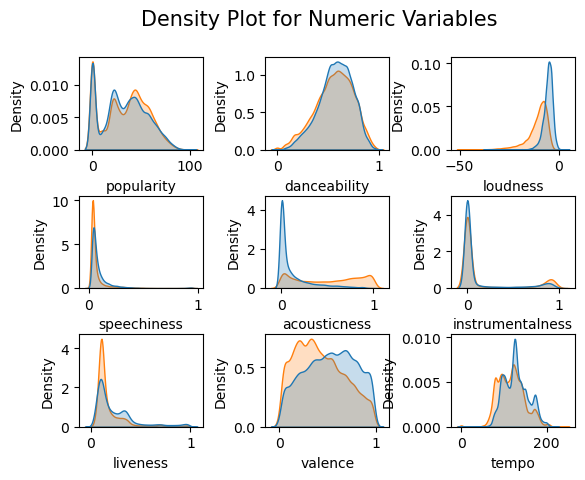

In [25]:
%matplotlib inline
fig, axes = plt.subplots(3, 3)

sns.kdeplot(data=df_copy, x='popularity', hue='energy_level', fill=True, ax=axes[0, 0], legend = False)
sns.kdeplot(data=df_copy, x='danceability', hue='energy_level', fill=True, ax=axes[0, 1], legend=False)
sns.kdeplot(data=df_copy, x='loudness', hue='energy_level', fill=True, ax=axes[0, 2], legend=False)
sns.kdeplot(data=df_copy, x='speechiness', hue='energy_level', fill=True, ax=axes[1, 0], legend = False)
sns.kdeplot(data=df_copy, x='acousticness', hue='energy_level', fill=True, ax=axes[1, 1], legend=False)
sns.kdeplot(data=df_copy, x='instrumentalness', hue='energy_level', fill=True, ax=axes[1, 2], legend=False)
sns.kdeplot(data=df_copy, x='liveness', hue='energy_level', fill=True, ax=axes[2, 0], legend=False)
sns.kdeplot(data=df_copy, x='valence', hue='energy_level', fill=True, ax=axes[2, 1], legend=False)
sns.kdeplot(data=df_copy, x='tempo', hue='energy_level', fill=True, ax=axes[2, 2], legend=False)

plt.subplots_adjust(hspace=0.5, wspace = 0.5)
fig.suptitle('Density Plot for Numeric Variables', fontsize=15)
plt.show()

From the density plots, we can see that the high and low energy tracks are slightly separated for the features: acousticness, liveness, loudness, and valence.

### Barcharts for High and Low Energy

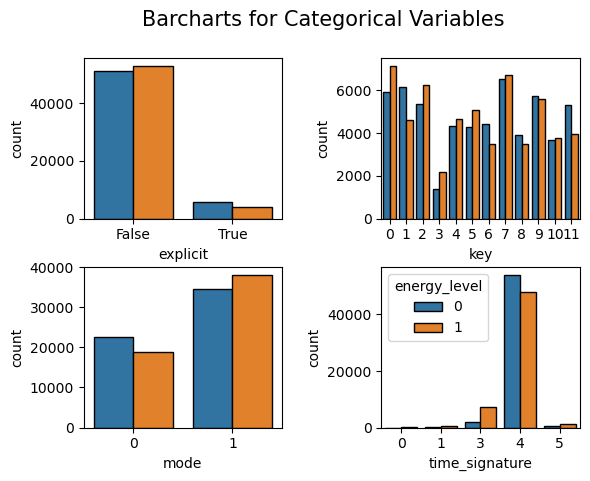

In [26]:
%matplotlib inline
fig, axes = plt.subplots(2, 2)

sns.countplot(x='explicit', hue='energy_level', data=df_copy, ax=axes[0, 0])
axes[0,0].legend().set_visible(False)
sns.countplot(x='key', hue='energy_level', data=df_copy, ax=axes[0, 1])
axes[0,1].legend().set_visible(False)
sns.countplot(x='mode', hue='energy_level', data=df_copy, ax=axes[1, 0])
axes[1,0].legend().set_visible(False)
sns.countplot(x='time_signature', hue='energy_level', data=df_copy, ax=axes[1, 1])

plt.subplots_adjust(hspace=0.3, wspace = 0.5)
fig.suptitle('Barcharts for Categorical Variables', fontsize=15)
plt.show()

From the barcharts, we can see that there is significant separation of high and low energy for key, mode and time signature.

## Linear Regression

We will be using all numeric features in order to train our linear regression model to predict energy.

**Input**: popularity, duration_ms, danceability, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo

**Output**: continuous energy values

In [27]:
numeric_cols = df.select_dtypes(include=['number']).columns
df_linear = df[numeric_cols]
df_linear = df_linear.drop(['mode', 'time_signature', 'energy', 'key'], axis = 1)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df_linear
y = df['energy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Baseline LAD and LS Model

In [29]:
from sklego.linear_model import LADRegression
from sklearn.linear_model import LinearRegression

lad_fit = LADRegression()
lad_fit.fit(X_train, y_train)
ls_fit = LinearRegression()
ls_fit.fit(X_train,y_train)

print("LAD Regression: ")
print("Intercept: ", lad_fit.intercept_)
print("Coefficients: ", lad_fit.coef_, "\n")
print("LS Regression: ")
print("Intercept: ", ls_fit.intercept_)
print("Coefficients: ", ls_fit.coef_)

LAD Regression: 
Intercept:  0.644838753482
Coefficients:  [-0.00106454  0.00668262 -0.03239469  0.14585161  0.03047094 -0.11183234
  0.03870811  0.02365357  0.04227305  0.00657875] 

LS Regression: 
Intercept:  0.641258530688
Coefficients:  [-0.00227833  0.00557622 -0.03090196  0.13614887  0.02745402 -0.10604871
  0.03566312  0.02605093  0.04072503  0.00754636]


In [30]:
# Baseline Models Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evalLinear(df):
    rMSE = np.sqrt(mean_squared_error(df['true'], df['pred']))
    MAE = mean_absolute_error(df['true'], df['pred'])
    MAD = np.median(np.abs(df['true'] - df['pred']))
    cor = np.corrcoef(df['true'], df['pred'])[0, 1]
    R2 = r2_score(df['true'], df['pred'])
    return {'rMSE': rMSE,'MAE': MAE,'MAD': MAD,'Correlation': cor,'R^2': R2}

ladTrain = pd.DataFrame({'true': y_train,'pred': lad_fit.predict(np.array(X_train))})
ladTrainEval = evalLinear(ladTrain)
ladTest = pd.DataFrame({'true': y_test, 'pred': lad_fit.predict(np.array(X_test))})
ladTestEval = evalLinear(ladTest)
lsTrain = pd.DataFrame({'true': y_train,'pred': ls_fit.predict(np.array(X_train))})
lsTrainEval = evalLinear(lsTrain)
lsTest = pd.DataFrame({'true': y_test, 'pred': ls_fit.predict(np.array(X_test))})
lsTestEval = evalLinear(lsTest)

pd.DataFrame([ladTrainEval, ladTestEval, lsTrainEval, lsTestEval], index=['LAD Train', 'LAD Test', 'LS Train', 'LS Test'])

,rMSE,MAE,MAD,Correlation,R^2
LAD Train,0.122852,0.093862,0.076091,0.874278,0.761578
LAD Test,0.122681,0.093364,0.075177,0.874389,0.761800
LS Train,0.122054,0.094566,0.078225,0.874451,0.764664
LS Test,0.121861,0.094064,0.077583,0.874628,0.764972


Our initial baseline LAD and LS model has a relatively high correlation of around 0.87 and R-squared of 0.76 across the training and testing data. In addition the errors are not very different across the training and testing data indicating that our model is not underfitting or overfitting.

However, let's try performing regularization to see if we can improve model generalizaion, handle any multicollinearity through ridge (L2) and analyze feature importance through lasso (L1).

### Lasso Regularization (L1)

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1) # try changing alpha to make it better!
lasso.fit(X_train, y_train)

lasso_coefficients = lasso.coef_
feature_names = df_linear.columns
important_features = [(feature, coef) for feature, coef in zip(feature_names, lasso_coefficients) if coef != 0]
important_features = sorted(important_features, key=lambda x: abs(x[1]), reverse=True)

# Feature Importance
print("Important Features:")
for feature, coef in important_features:
    print(f"{feature}: {coef}")

Important Features:
loudness: 0.06425095783864483
acousticness: -0.04662388671165257


From the coefficients of our lasso regression, we can see that the model has shrunk all other variables to 0 except loudness and acousticness which shows that these are significant predictors.

In [32]:
# Lasso evaluation
lassoTrain = pd.DataFrame({'true': y_train,'pred': lasso.predict(np.array(X_train))})
lassoTrainEval = evalLinear(lassoTrain)
lassoTest = pd.DataFrame({'true': y_test, 'pred': lasso.predict(np.array(X_test))})
lassoTestEval = evalLinear(lassoTest)

pd.DataFrame([lassoTrainEval, lassoTestEval], index=['Lasso Train', 'Lasso Test'])

,rMSE,MAE,MAD,Correlation,R^2
Lasso Train,0.176875,0.150386,0.146766,0.838504,0.505787
Lasso Test,0.176733,0.150045,0.146159,0.838463,0.505662


Our lasso regression actually decreased the R-squared drastically, which could be due to setting the penalty value too high. Therefore, we will perform cross-validation to find the best alpha and test our model again.

In [33]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=None, cv=5, random_state=42).fit(X_train, y_train)
optimal_alpha = lasso_cv.alpha_

lasso = Lasso(alpha=optimal_alpha)
lasso.fit(X_train, y_train)

lassoTrain = pd.DataFrame({'true': y_train,'pred': lasso.predict(np.array(X_train))})
lassoTrainEval = evalLinear(lassoTrain)
lassoTest = pd.DataFrame({'true': y_test, 'pred': lasso.predict(np.array(X_test))})
lassoTestEval = evalLinear(lassoTest)
pd.DataFrame([lassoTrainEval, lassoTestEval], index=['Lasso Train', 'Lasso Test'])

,rMSE,MAE,MAD,Correlation,R^2
Lasso Train,0.122056,0.094603,0.078252,0.874448,0.764658
Lasso Test,0.121860,0.094100,0.077717,0.874632,0.764976


The metrics did not really change much compared to our baseline models. Lasso regression did not really improve our model even with the tuned alpha so we will try ridge next to handle any multicollinearity.

### Ridge Regularization (L2)

In [34]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], store_cv_values=True).fit(X_train, y_train)
optimal_alpha = ridge_cv.alpha_
print("Optimal Alpha:", optimal_alpha)

ridge = Ridge(alpha=optimal_alpha)
ridge.fit(X_train, y_train)

# Ridge Evaluation
ridgeTrain = pd.DataFrame({'true': y_train,'pred': ridge.predict(np.array(X_train))})
ridgeTrainEval = evalLinear(ridgeTrain)
ridgeTest = pd.DataFrame({'true': y_test, 'pred': ridge.predict(np.array(X_test))})
ridgeTestEval = evalLinear(ridgeTest)
pd.DataFrame([ridgeTrainEval, ridgeTestEval], index=['Ridge Train', 'Ridge Test'])

Optimal Alpha: 10.0


c:\Users\Shawn\anaconda3\envs\CS148\lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


,rMSE,MAE,MAD,Correlation,R^2
Ridge Train,0.122054,0.094568,0.078223,0.874451,0.764664
Ridge Test,0.121861,0.094066,0.077583,0.874628,0.764972


The metrics did not really change much compared to our baseline models. Ridge regression did not really improve our model even with the tuned alpha.

## Logistic Regression

We will create a logistic regression model to classify high and low energy tracks (binary). From our density and barcharts in our EDA, we will select the features that show distinction between high and low energy.

**Input**: loudness, acousticness, liveness, valence, key, mode, time_signature

**Output**: energy level (high, low)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [36]:
X = df_copy[['loudness', 'acousticness', 'liveness', 'valence', 'key', 'mode', 'time_signature']]
y = df_copy['energy_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Prediction accuracy and error
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")
print(f"Prediction Error: {(1-accuracy) * 100:.2f}%")

Prediction Accuracy: 82.60%
Prediction Error: 17.40%


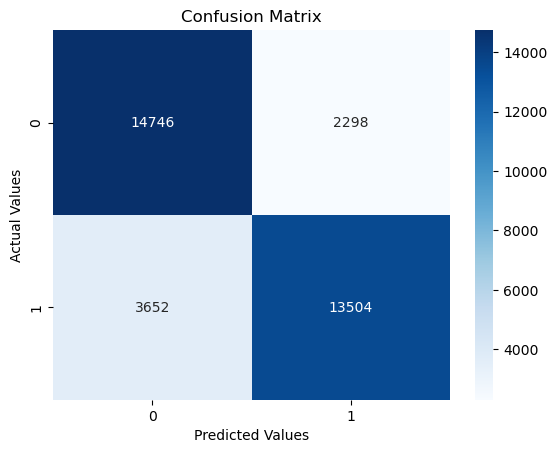

True Positive Rate: 0.7871
True Negative Rate: 0.8652


In [39]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

# True posiive and negative rate
truePositiveRate = cm[1,1] / (cm[1,1] + cm[1,0])
falsePositiveRate = cm[0,1] / (cm[0,1] + cm[0,0])
print(f"True Positive Rate: {truePositiveRate:.4f}")
print(f"True Negative Rate: {1-falsePositiveRate:.4f}")

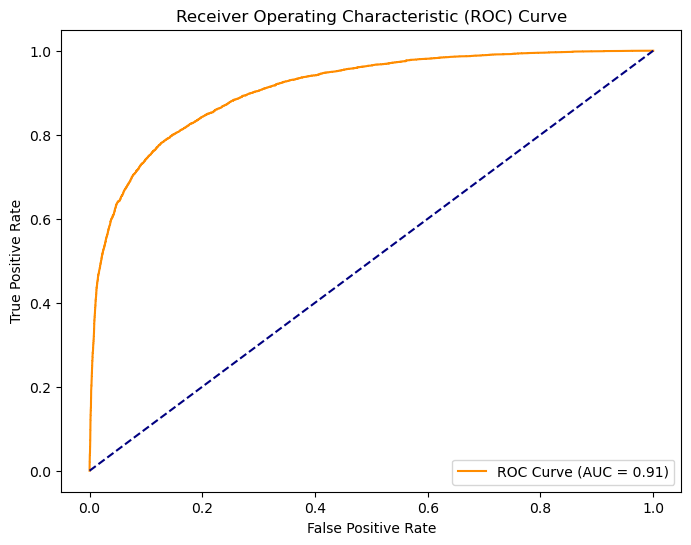

In [40]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Our model has a very high AUC of 0.91, indicating that the model has good performance and is good at distinguishing between the positive and negative classes, but still struggles with false positives.

In [41]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('optimal_threshold: ', optimal_threshold)

optimal_threshold:  0.514346540084


To choose a threshold for positive predictions, we examined the ROC curve and which showed how true positive rate (TPR) and false positive rate (FPR) change as the threshold varies, and we used the AUC score as a measure of overall model performance. We selected a threshold of 0.48 from calculating the optimal threshold where where (TPR - FPR) is maximized.

In [42]:
from sklearn.model_selection import cross_val_score

model_cv = LogisticRegression()
cv_scores = cross_val_score(model_cv, X, y, cv=5)

print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")

Cross-Validation Scores for each fold: [ 0.83315789  0.78627193  0.82890351  0.84192982  0.81490416]
Mean Cross-Validation Accuracy: 82.10%


From our CV accuracy, we can see that the logistic regression was pretty accurate in predicting the energy level of a track.

## K-Nearest Neighbors

We will use KNN models (k=1, 15, 25) in order to classify high and low energy tracks using loudness and acousticness, which we have chosen using our correlation matrix and density plot.

**Input**: loudness, acousticness

**Output**: energy level (low, high)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import roc_curve, auc

In [44]:
# dropping energy_level, and the non numerical features
X = df_copy[['loudness', 'acousticness']] # chosen using our correlation matrix
y = df_copy['energy_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn15 = KNeighborsClassifier(n_neighbors=15)
knn25 = KNeighborsClassifier(n_neighbors=25)

In [46]:
knn1.fit(X_train, y_train)
knn15.fit(X_train, y_train)
knn25.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [47]:
y_pred1 = knn1.predict(X_test)
y_pred15 = knn15.predict(X_test)
y_pred25 = knn25.predict(X_test)

In [48]:
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy15 = accuracy_score(y_test, y_pred15)
accuracy25 = accuracy_score(y_test, y_pred25)

print(f"Accuracy knn1: {accuracy1}")
print(f"Accuracy knn15: {accuracy15}")
print(f"Accuracy knn25: {accuracy25}")

Accuracy knn1: 0.8476608187134503
Accuracy knn15: 0.8319005847953216
Accuracy knn25: 0.8300292397660819


### Confusion Matrices

In [49]:
models = {
    "knn1": knn1,
    "knn15": knn15,
    "knn25": knn25
}

# Helper function for threshold-based prediction
def t_repredict(model, t, X):
    probs = model.predict_proba(X)[:, 1]  # Get probabilities for the positive class
    y_pred = (probs > t).astype(int)  # Apply threshold
    return y_pred

# Iterate over models and calculate metrics
for name, model in models.items():
    # Default threshold (0.5)
    y_pred_train_default = t_repredict(model, 0.5, X_train)

    # Custom threshold (0.65)
    y_pred_train_custom = t_repredict(model, threshold, X_train)

    # Confusion Matrix
    conf_matrix_train = confusion_matrix(y_train, y_pred_train_custom)
    TN, FP, FN, TP = conf_matrix_train.ravel()

    # Metrics
    accuracy = accuracy_score(y_train, y_pred_train_custom)
    error = 1 - accuracy # Prediction error
    true_positive_rate = TP / (TP + FN) # Sensitivity / Recall
    true_negative_rate = TN / (TN + FP) # Specificity
    f1 = f1_score(y_train, y_pred_train_custom)

    # Display results
    print(f"--- Metrics for {name} ---")
    print("Confusion Matrix:\n", conf_matrix_train)
    print("Prediction Accuracy:", accuracy)
    print("Prediction Error:", error)
    print("True Positive Rate (Recall/Sensitivity):", true_positive_rate)
    print("True Negative Rate (Specificity):", true_negative_rate)
    print("F1 Score:", f1)
    print()

--- Metrics for knn1 ---
Confusion Matrix:
 [[39942    16]
 [   10 39831]]
Prediction Accuracy: 0.9996741813807191
Prediction Error: 0.0003258186192809376
True Positive Rate (Recall/Sensitivity): 0.999749002284
True Negative Rate (Specificity): 0.999599579559
F1 Score: 0.999673727537

--- Metrics for knn15 ---
Confusion Matrix:
 [[37251  2707]
 [11185 28656]]
Prediction Accuracy: 0.8259126054211205
Prediction Error: 0.17408739457887945
True Positive Rate (Recall/Sensitivity): 0.719259054743
True Negative Rate (Specificity): 0.93225386656
F1 Score: 0.804898601202

--- Metrics for knn25 ---
Confusion Matrix:
 [[37053  2905]
 [11956 27885]]
Prediction Accuracy: 0.8137695961102269
Prediction Error: 0.18623040388977308
True Positive Rate (Recall/Sensitivity): 0.699907130845
True Negative Rate (Specificity): 0.927298663597
F1 Score: 0.789596636038



### ROC Curve

<Axes: title={'center': 'ROC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

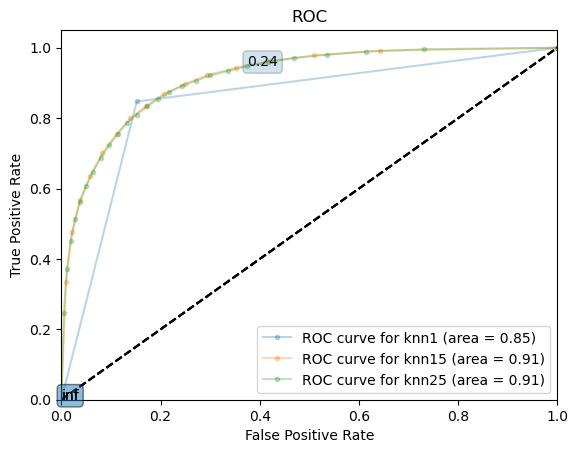

In [50]:
%matplotlib inline
# a function to make 'pretty' ROC curves for this model
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

make_roc("knn1", knn1, y_test, X_test, ax=None, labe=20, proba=True, skip=1)
make_roc("knn15", knn15, y_test, X_test, ax=None, labe=20, proba=True, skip=1)
make_roc("knn25", knn25, y_test, X_test, ax=None, labe=20, proba=True, skip=1)


In [51]:
from sklearn.model_selection import cross_val_score
X_cv =  X
y_cv =  y

# Perform 5-Fold Cross-Validation
cv_scores_knn1 = cross_val_score(knn1, X_cv, y_cv, cv=5)
cv_scores_knn15 = cross_val_score(knn15, X_cv, y_cv, cv=5)
cv_scores_knn25 = cross_val_score(knn25, X_cv, y_cv, cv=5)

print(f"Cross-Validation Scores for each fold for knn1: {cv_scores_knn1}")
print(f"Mean Cross-Validation Accuracy for knn1: {np.mean(cv_scores_knn1) * 100:.2f}%")
print()
print(f"Cross-Validation Scores for each fold for knn15: {cv_scores_knn15}")
print(f"Mean Cross-Validation Accuracy for knn15: {np.mean(cv_scores_knn15) * 100:.2f}%")
print()
print(f"Cross-Validation Scores for each fold for knn25: {cv_scores_knn25}")
print(f"Mean Cross-Validation Accuracyfor knn25: {np.mean(cv_scores_knn25) * 100:.2f}%")

Cross-Validation Scores for each fold for knn1: [ 0.82263158  0.8120614   0.84184211  0.85837719  0.7959121 ]
Mean Cross-Validation Accuracy for knn1: 82.62%

Cross-Validation Scores for each fold for knn15: [ 0.8247807   0.79622807  0.84065789  0.845       0.79288565]
Mean Cross-Validation Accuracy for knn15: 81.99%

Cross-Validation Scores for each fold for knn25: [ 0.82412281  0.79342105  0.84052632  0.84315789  0.79082416]
Mean Cross-Validation Accuracyfor knn25: 81.84%


### Results

From our cross-validation results, we can see that the KNN models of k=1, 15 and 25 all had an accuracy of around 82%, which is similar to the logistic model. This indicates that KNN is still pretty effective in classifying high and low energy tracks given loudness and acousticness. This is less complex than the logistic model given that we are only using 2 features here and are still able to obtain the same accuracy.

We can possibly improve this model by testing more values of k and also incorporating more features into the model.

## K-Means Clustering

We decided on using the two variables, energy and acousticness, by looking at the correlation matrix and picking 2 variables that had a very high correlation.

**Input**: energy, acousticness

In [52]:
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [53]:
# Normalize and scale data
clusterdf = df[['energy', 'acousticness']]
clusterdf = clusterdf.apply(lambda x: (x -min(x))/(max(x)-min(x)))
ss = StandardScaler()
clusterdf_ss = ss.fit_transform(clusterdf)

### Optimal Number of Clusters

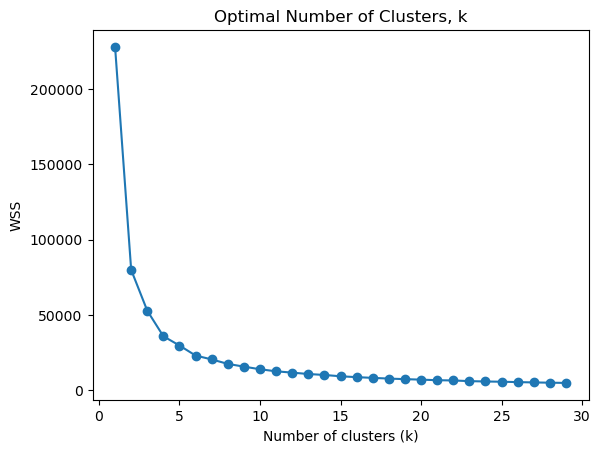

In [54]:
# Determine best k-value
wss = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, n_init = 'auto')
    kmeans.fit(clusterdf_ss)
    wss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 30), wss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSS")
plt.title("Optimal Number of Clusters, k")
plt.show()

In order to determine the best k value, we will evaluate the WSS at various k's and select the k with the lowest WSS and smallest k (Elbow Method). Based on the plot, we will use k=6 as it is where the elbow point is.

In [55]:
# Apply k-means with k=6
kmeans = KMeans(n_clusters=6, n_init= 'auto')
y_kmeans = kmeans.fit_predict(clusterdf_ss)
centroids = kmeans.cluster_centers_

### Visualizing Clusters

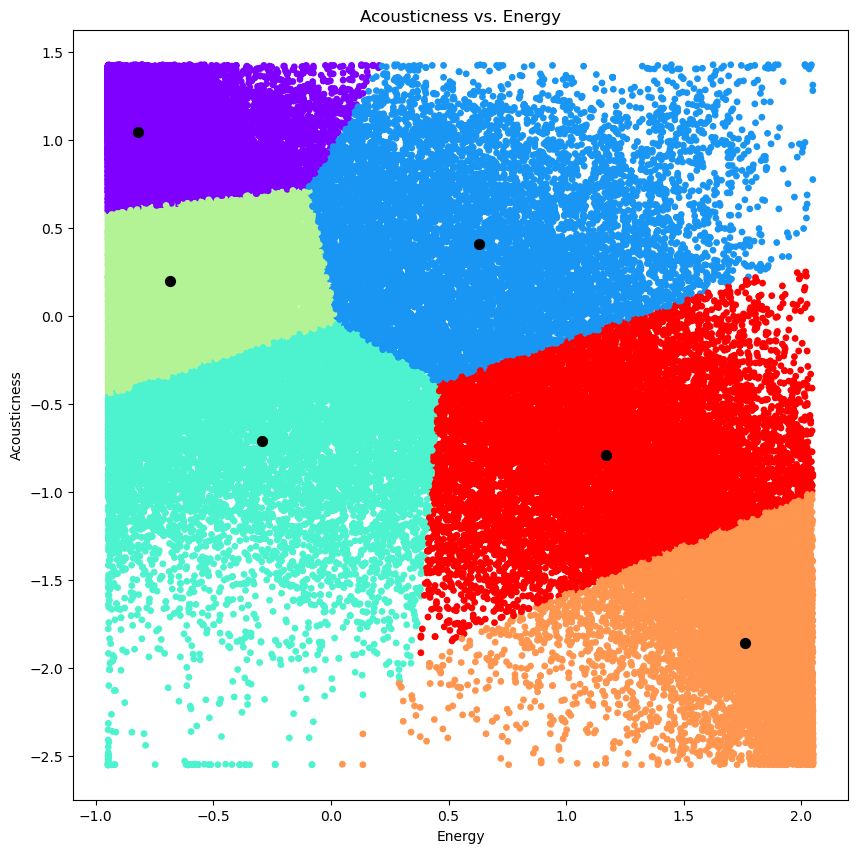

In [56]:
# Visualizing the k-means clusters
plt.figure(figsize=(10,10))
scatter = plt.scatter(clusterdf_ss[:,1], clusterdf_ss[:,0], c = y_kmeans, cmap='rainbow', s = 15)
plt.scatter(centroids[:, 1], centroids[:, 0], c='black', s=50)
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.title("Acousticness vs. Energy")
plt.show()

### Quantitative Metrics

In [57]:
from sklearn.metrics import silhouette_score

print('K-Means Inertia:', round(kmeans.inertia_, 1), '\n')
print('Silhouette Score: ', round(silhouette_score(clusterdf_ss, y_kmeans), 4))

K-Means Inertia: 22959.0 

Silhouette Score:  0.4331


### Results

Clustering allows us to see underlying patterns in the data. From our scatterplot of Acousticness vs. Energy, we can see 6 disinct clusters that they are separated into geometric shapes. The clusters are relatively even in size, with outliers being the very small purple cluster and the decently large red and orange clusters.

These clusters have a silouette score of 0.4322 indicating a moderate clustering. Although the clusters are distinct, they are not isolated from one another very well.

From these results, we can see that there are three clusters that tend to have higher energy and three clusters that tend to have lower energy. It would be interesting to explore the features that may be causing this, such as the type of genre.

## Neural Network

### Regression NN

We will create a regression neural network to predict the energy value given acousticness and loudness since they are heavily correlated with energy.

**Input**: acousticness, loudness

**Output**: continous energy values

We will be using the Mean Squared Error loss function to evaluate the performance of our NN as it is measuring how far off the model's predictions are from the actual target values. A lower MSE indicates that the predictions are closer to the true values.

In [58]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [59]:
# Split Data
scaler = StandardScaler()

X = df[["acousticness", 'loudness']].values
y = df['energy'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

y_train_tensor = y_train_tensor.unsqueeze(1)
y_val_tensor = y_val_tensor.unsqueeze(1)

In [60]:
# Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [61]:
# Initialize the model, loss function, optimizer and scheduler
model = SimpleNN()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.5)

### Learning Rate Tuning

In [62]:
# Training Model with Learning Rate Scheduler
epochs = 100
losses = []
learning_rates = []

for epoch in range(epochs):
    # Forward pass
    predictions = model(X_train_tensor)
    loss = loss_fn(predictions, y_train_tensor)

    losses.append(loss.item())
    learning_rates.append(optimizer.param_groups[0]['lr'])

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Print loss every 10 epochs
    if (epoch + 1) % 5 == 0 or epoch == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Learning Rate: {optimizer.param_groups[0]["lr"]:.8f}')

Epoch [1/100], Loss: 0.3670, Learning Rate: 0.10000000
Epoch [5/100], Loss: 0.0715, Learning Rate: 0.10000000
Epoch [10/100], Loss: 0.0343, Learning Rate: 0.05000000
Epoch [15/100], Loss: 0.0285, Learning Rate: 0.05000000
Epoch [20/100], Loss: 0.0259, Learning Rate: 0.02500000
Epoch [25/100], Loss: 0.0250, Learning Rate: 0.02500000
Epoch [30/100], Loss: 0.0245, Learning Rate: 0.01250000
Epoch [35/100], Loss: 0.0243, Learning Rate: 0.01250000
Epoch [40/100], Loss: 0.0241, Learning Rate: 0.00625000
Epoch [45/100], Loss: 0.0240, Learning Rate: 0.00625000
Epoch [50/100], Loss: 0.0240, Learning Rate: 0.00312500
Epoch [55/100], Loss: 0.0239, Learning Rate: 0.00312500
Epoch [60/100], Loss: 0.0239, Learning Rate: 0.00156250
Epoch [65/100], Loss: 0.0239, Learning Rate: 0.00156250
Epoch [70/100], Loss: 0.0238, Learning Rate: 0.00078125
Epoch [75/100], Loss: 0.0238, Learning Rate: 0.00078125
Epoch [80/100], Loss: 0.0238, Learning Rate: 0.00039063
Epoch [85/100], Loss: 0.0238, Learning Rate: 0.000

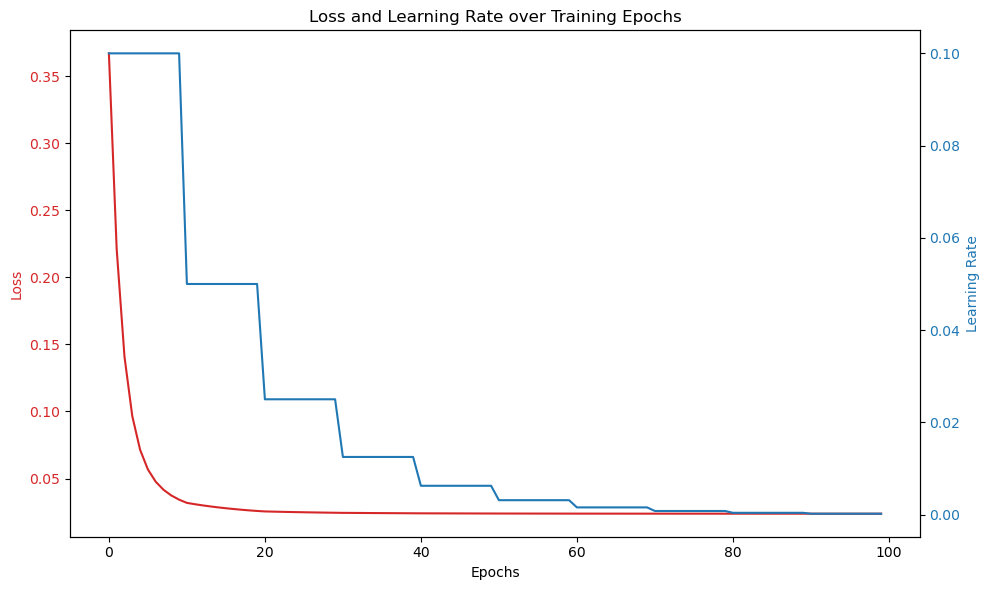

In [63]:
# Plot of Learning Rates and Loss
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(range(epochs), losses, color='tab:red', label='Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate', color='tab:blue')
ax2.plot(range(epochs), learning_rates, color='tab:blue', label='Learning Rate')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Loss and Learning Rate over Training Epochs')
fig.tight_layout()
plt.show()

To train our NN, the training datasets were preprocessed and converted to tensors. We used stochastic gradient descent as our optimization algorithm with an initial learning rate of 0.1. The learning rate determines the size of weight updates and we used a learning rate scheduler with forward and backward pass to find the optimal learning rate of 0.05. We trained for 100 epochs.

### Training and Validation rMSE and Loss

Epoch [1/500], Training Loss: 0.2927, Validation Loss: 0.2439
Epoch [50/500], Training Loss: 0.0454, Validation Loss: 0.0448
Epoch [100/500], Training Loss: 0.0302, Validation Loss: 0.0301
Epoch [150/500], Training Loss: 0.0261, Validation Loss: 0.0260
Epoch [200/500], Training Loss: 0.0242, Validation Loss: 0.0241
Epoch [250/500], Training Loss: 0.0230, Validation Loss: 0.0229
Epoch [300/500], Training Loss: 0.0222, Validation Loss: 0.0221
Epoch [350/500], Training Loss: 0.0215, Validation Loss: 0.0214
Epoch [400/500], Training Loss: 0.0209, Validation Loss: 0.0208
Epoch [450/500], Training Loss: 0.0204, Validation Loss: 0.0203
Epoch [500/500], Training Loss: 0.0199, Validation Loss: 0.0198


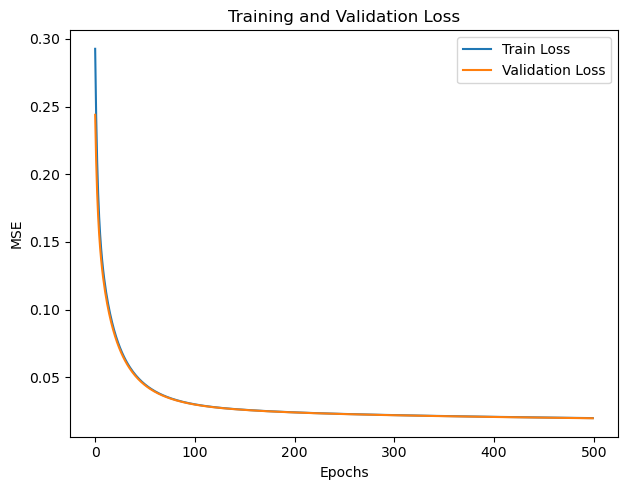

In [64]:
model = SimpleNN()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

epochs = 500
trainloss = []
trainmse = []
valloss = []
valmse = []

for epoch in range(epochs):
    model.train()

    running_loss = 0.0
    running_mse = 0.0

    optimizer.zero_grad()

    outputs = model(X_train_tensor)

    # Calculate training loss
    loss = loss_fn(outputs, y_train_tensor)
    running_loss += loss.item()

    # Backpropagation
    loss.backward()
    optimizer.step()

    trainloss.append(running_loss)

    model.eval()
    runningval_loss = 0.0

    with torch.no_grad():
        outputs = model(X_val_tensor)

        val_loss = loss_fn(outputs, y_val_tensor)
        runningval_loss += val_loss.item()

    valloss.append(runningval_loss)

    if (epoch + 1) % 50 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss:.4f}, Validation Loss: {runningval_loss:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(trainloss, label='Train Loss')
plt.plot(valloss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')

plt.tight_layout()
plt.legend()
plt.show()

From the performance plots of the training and validation data, we can see that the loss and rMSE is decreasing and there is not much difference between the values of the training and validation data, indicating that the model is not overfitting and performing well.

### Classification NN

We will create a binary classification neural network to predict the energy level.

**Input**: loudness, acousticness, liveness, valence, key, mode, time_signature

**Output**: energy level (low, high)

We will be using the Binary Cross-Entropy Loss since we are dealing with a binary classification problem.

In [65]:
# Split Data
scaler = StandardScaler()

X = df_copy[['loudness', 'acousticness', 'liveness', 'valence', 'key', 'mode', 'time_signature']]
y = df_copy['energy_level'].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

y_train_tensor = y_train_tensor.unsqueeze(1)
y_val_tensor = y_val_tensor.unsqueeze(1)

In [66]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(7, 70)
        self.layer2 = nn.Linear(70, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

In [67]:
model = SimpleNN()
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

Epoch [1/500], Training Loss: 0.7283, Training Accuracy: 42.61, Validation Loss: 0.7190, Validation Accuracy: 43.77%
Epoch [50/500], Training Loss: 0.5261, Training Accuracy: 78.82, Validation Loss: 0.5241, Validation Accuracy: 78.98%
Epoch [100/500], Training Loss: 0.4570, Training Accuracy: 80.27, Validation Loss: 0.4556, Validation Accuracy: 80.56%
Epoch [150/500], Training Loss: 0.4250, Training Accuracy: 80.95, Validation Loss: 0.4235, Validation Accuracy: 81.23%
Epoch [200/500], Training Loss: 0.4082, Training Accuracy: 81.42, Validation Loss: 0.4066, Validation Accuracy: 81.72%
Epoch [250/500], Training Loss: 0.3986, Training Accuracy: 81.63, Validation Loss: 0.3968, Validation Accuracy: 81.89%
Epoch [300/500], Training Loss: 0.3927, Training Accuracy: 81.84, Validation Loss: 0.3908, Validation Accuracy: 82.11%
Epoch [350/500], Training Loss: 0.3888, Training Accuracy: 81.99, Validation Loss: 0.3868, Validation Accuracy: 82.24%
Epoch [400/500], Training Loss: 0.3860, Training Ac

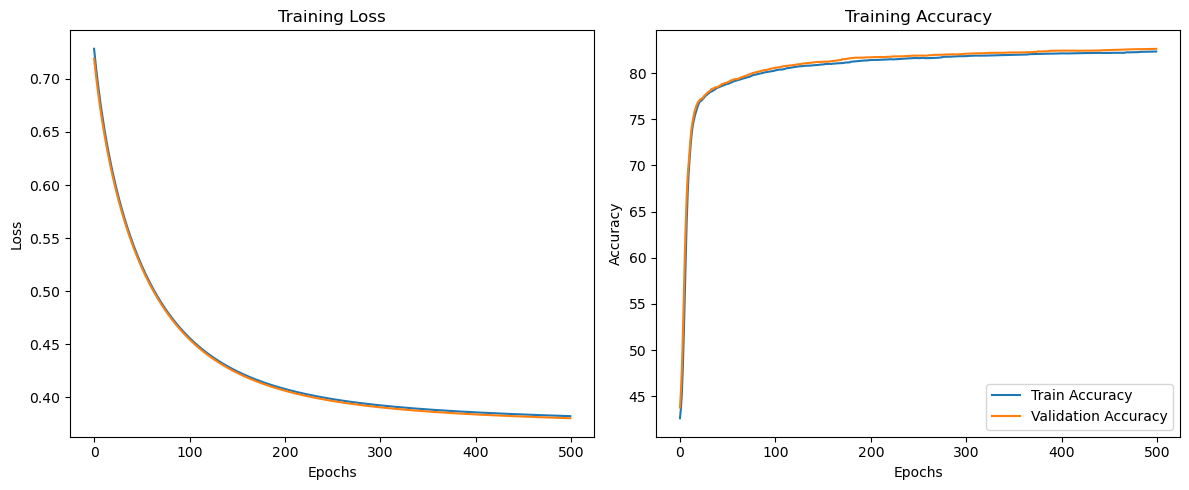

In [68]:
epochs = 500
trainloss = []
trainaccuracy = []
vallosses = []
valaccuracy = []

for epoch in range(epochs):
    model.train()

    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    optimizer.zero_grad()

    outputs = model(X_train_tensor)

    loss = loss_fn(outputs, y_train_tensor)
    running_loss += loss.item()

    loss.backward()
    optimizer.step()

    predicted = (outputs > 0.5).float()
    correct_preds += (predicted == y_train_tensor).sum().item()
    total_preds += y_train_tensor.size(0)

    accuracy = correct_preds / total_preds * 100

    trainloss.append(running_loss)
    trainaccuracy.append(accuracy)

    model.eval()
    val_loss = 0.0
    val_acc = 0.0
    correct_predictions_val = 0
    total_predictions_val = 0

    with torch.no_grad():
        outputs = model(X_val_tensor)

        loss = loss_fn(outputs, y_val_tensor)
        val_loss += loss.item()

        predicted = (outputs > 0.5).float()
        correct_predictions_val += (predicted == y_val_tensor).sum().item()
        total_predictions_val += y_val_tensor.size(0)

        val_acc = correct_predictions_val / total_predictions_val * 100

    vallosses.append(val_loss)
    valaccuracy.append(val_acc)

    if (epoch + 1) % 50 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss:.4f}, Training Accuracy: {accuracy:.2f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(trainloss, label='Train Loss')
plt.plot(vallosses, label='Validation Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(trainaccuracy, label='Train Accuracy')
plt.plot(valaccuracy, label='Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.legend()
plt.show()